# Language Understanding

컴퓨터가 자연어로 말하거나 입력된 명령을 이해하기 위해 AI를 사용할 것에 대한 기대치가 점점 높아지고 있습니다. 예를 들어 "불 켜" 또는 "난방 올려"와 같은 음성 명령을 사용하여 가정 내 디바이스를 제어할 수 있는 홈 자동화 시스템을 구현하고, AI로 구동되는 디바이스가 명령을 이해하고 적절한 작업을 수행하도록 하기를 원할 수도 있습니다.

![듣고 있는 로봇](./images/language_understanding.jpg)

## 작성 및 예측 리소스 만들기

Microsoft Cognitive Services에는 *말하기*를 통해 *엔터티*에 적용되는 *의도*를 정의할 수 있는 Language Understanding 서비스가 포함되어 있습니다. 

Language Understanding 서비스를 사용하려면 두 가지 종류의 리소스가 필요합니다.

- *작성* 리소스: 언어 모델을 정의하고 학습시키고 테스트하는 데 사용됩니다. Azure 구독에서 **Language Understanding - Authoring** 리소스여야 합니다.
- *예측* 리소스: 모델을 게시하고 이를 사용하는 클라이언트 애플리케이션의 요청을 처리하는 데 사용됩니다. Azure 구독에서 **Language Understanding** 또는 **Cognitive Services** 리소스여야 합니다.

**Language Understanding** 또는 **Cognitive Services** 리소스를 사용하여 Language Understanding 앱을 *게시*할 수 있지만 앱을 *작성*하기 위한 별도의 **Language Understanding** 리소스를 만들어야 합니다.

> **중요**: 작성 리소스는 유럽, 오스트레일리아, 미국의 세 *지역* 중 하나에서 생성되어야 합니다. 유럽 또는 오스트레일리아 작성 리소스로 생성된 모델은 각각 유럽 또는 오스트레일리아의 예측 리소스에만 배포할 수 있습니다. 미국 작성 리소스에서 생성된 모델은 유럽과 오스트레일리아 이외의 모든 Azure 위치에서 예측 리소스에 배포될 수 있습니다. 작성 및 예측 위치를 맞추는 것에 대한 자세한 내용은 [작성 및 게시 지역 설명서](https://docs.microsoft.com/azure/cognitive-services/luis/luis-reference-regions)를 참조하세요.

1. 다른 브라우저 탭에서 Azure Portal([https://portal.azure.com](https://portal.azure.com)) 을 열고 Microsoft 계정으로 로그인합니다.
2. **+ 리소스 만들기**를 클릭하고 *Language Understanding*을 검색합니다.
3. 서비스 목록에서 **Language Understanding**을 클릭합니다.
4. **Language Understanding** 블레이드에서 **만들기**를 클릭합니다.
5. **만들기** 블레이드에서 다음 세부 정보를 입력하고 **만들기**를 클릭합니다.
   - **옵션 만들기**: 모두
   - **이름**: *서비스의 고유한 이름*
   - **구독**: *Azure 구독 선택*
   - **리소스 그룹**: *기존 리소스 그룹을 선택하거나 새로 만들기*
   - **작성 위치**: *선호하는 위치 선택*
   - **작성 가격 책정 계층**: F0
   - **예측 위치**: *작성 위치와 동일한 지역의 위치를 선택*
   - **예측 가격 책정 계층**: F0
   
6. 리소스가 생성될 때까지 기다리고 두 개의 Language Understanding 리소스가 프로비전되는 것을 확인합니다. 하나는 작성을 위한 것이고, 다른 하나는 예측을 위한 것입니다. 이러한 리소스는 자신이 만든 리소스 그룹으로 이동하여 확인할 수 있습니다.

### Language Understanding 앱 만들기

Language Understanding을 통해 자연어 이해를 구현하려면 앱을 만든 후에 엔터티, 의도, 말하기를 추가하여 앱이 이해하도록 할 명령을 정의합니다.

1. 새 브라우저 탭에서 작성 리소스를 만든 작성 지역의 Language Understanding 포털을 엽니다.
    - 미국: [https://www.luis.ai](https://www.luis.ai)
    - 유럽: [https://eu.luis.ai](https://eu.luis.ai)
    - 오스트레일리아: [https://au.luis.ai](https://au.luis.ai)

2. Azure 구독과 연결된 Microsoft 계정으로 로그인합니다. Language Understanding 포털에 처음 로그인하는 경우 계정 세부 정보 액세스를 위한 몇 가지 권한을 앱에 부여해야 할 수 있습니다. 그런 다음 Azure 구독에서 방금 만든 기존 Language Understanding 작성 리소스를 선택하여 *시작* 단계를 완료합니다. 

3. **대화 앱** 페이지를 열고 구독 및 Language Understanding 작성 리소스를 선택합니다. 그리고 다음 설정을 사용하여 대화를 위한 새 앱을 만듭니다.
   - **이름**: Home Automation
   - **문화권**: 한국어 (*이 옵션을 사용할 수 없으면 공백으로 둠*)
   - **설명**: 간단한 홈 자동화
   - **예측 리소스**: *Language Understanding 예측 리소스*

4. 효과적인 Language Understanding 앱을 만들기 위한 팁이 담긴 패널이 표시되면 이를 닫습니다.

### 엔터티 만들기

*엔터티*는 언어 모델이 식별할 수 있고 무언가를 하는 데 사용할 수 있는 항목입니다. 이 경우, Language Understanding 앱은 사무실에서 조명이나 에어컨 같은 다양한 *디바이스*를 제어하는 데 사용되므로 앱이 작동하도록 할 디바이스 유형의 목록을 포함하는 *device* 엔터티를 만듭니다. 각 디바이스 유형에 대해 디바이스 이름(예: *light*) 그리고 해당 유형의 디바이스를 나타내는 데 사용될 수 있는 동의어(예: *lamp*)를 식별하는 하위 목록을 만듭니다.

1. 앱의 Language Understanding 페이지에서 왼쪽 창에 있는 **엔터티**를 클릭합니다. 그런 다음에 **만들기**를 클릭하고, **device**라는 새로운 엔터티를 만들고, **목록** 유형을 선택하고, **만들기**를 클릭합니다.
2. **목록 항목** 페이지의 **정규화된 값** 아래에서 **light**를 입력한 후에 ENTER 키를 누릅니다.
3. **조명** 값이 추가된 후에 **동의어** 아래에서 **lamp**를 입력하고 ENTER 키를 누릅니다.
4. **fan**이라는 두 번째 목록 항목을 **AC**라는 동의어와 함께 추가합니다.

> **참고**: 이 실습에서는 대소문자 텍스트를 지시한 대로 정확히 사용하고 _(예: Light가 **아니라** light)_ 공백을 더 추가하지 마세요. 

### 의도 만들기

*의도*는 하나 이상의 엔터티에 대해 수행할 작업입니다. 예를 들어 조명을 켜거나 에어컨을 끌 수 있습니다. 이 경우에는 두 개의 의도를 정의합니다. 하나는 디바이스를 켜는 것이고, 다른 하나는 디바이스를 끄는 것입니다. 각 의도에 대해 어떤 언어로 의도를 나타내는지를 보여주는 샘플 *말하기*를 지정합니다.

> **참고**: 이 실습에서는 대소문자 텍스트를 지시한 대로 정확히 사용하고 _(예: "Turn the light on ."이 **아니라** "turn the light on")_ 공백을 더 추가하지 마세요. 

1. 왼쪽 창에서 **의도**를 클릭합니다. 그런 다음에 **만들기**를 클릭하고, **switch_on**이라는 의도를 추가하고 **완료**를 클릭합니다.
2. **예제** 제목과 **예제 사용자 입력** 소제목 아래에서 ***turn the light on***이라는 말하기를 입력하고 **Enter** 키를 눌러 이 말하기를 목록에 추가합니다.
3. *turn the light on* 말하기에서 "light" 단어를 클릭하고 **device** 엔터티의 **light** 값에 할당합니다.

!["light" 단어를 엔터티 값에 할당하는 방법.](./images/assign_entity.jpg)

4. ***turn the fan on***이라는 문구로 두 번째 말하기를 **switch_on** 의도에 추가합니다. 그런 다음에 "fan"을 **device** 엔터티의 **fan** 값에 할당합니다.
5. 왼쪽 창에서 **의도**를 클릭하고 **만들기**를 클릭하여 **switch_off**라는 이름의 두 번째 의도를 추가합니다.
6. **switch_off** 의도의 **말하기** 페이지에서 ***turn the light off*** 말하기를 추가하고 "light" 단어를 **device** 엔터티의 **light** 값에 할당합니다.
7. ***turn the fan off***라는 문구로 두 번째 말하기를 **switch_off** 의도에 추가합니다. 그런 다음에 "fan"을 **device** 엔터티의 **fan** 값에 연결합니다.

### 언어 모델 학습 및 테스트

이제 엔터티, 의도, 말하기의 형태로 제공한 데이터를 사용하여 앱의 언어 모델을 학습시킬 준비가 되셨습니다.

1. 앱의 Language Understanding 페이지 상단에서 **학습**을 클릭하여 언어 모델을 학습시킵니다.
2. 모델이 학습되었으면 **테스트**를 클릭하고, 테스트 창을 사용하여 다음 문구에 대해 예측되는 의도를 봅니다.
    * *switch the light on*
    * *turn off the fan*
    * *turn the lamp off*
    * *switch on the AC*
3. 테스트 창을 닫습니다.
    
### 모델 게시 및 엔드포인트 구성

학습된 모델을 클라이언트 애플리케이션에서 사용하려면 클라이언트 애플리케이션이 새로운 말하기를 보낼 수 있는 엔드포인트로 모델을 게시해야 합니다. 여기서 의도와 엔터티를 예측할 수 있습니다.

1. 앱의 Language Understanding 페이지 상단에서 **게시**를 클릭합니다. 그런 다음에 **프로덕션 슬롯**을 선택하고 **완료**를 클릭합니다.

2. 모델이 게시된 후에는 앱의 Language Understanding 페이지 상단에서 **관리**를 클릭합니다. 그런 다음에 **설정** 탭에서 앱의 **앱 ID**를 메모합니다. 이 ID를 복사하고 아래 코드에 붙여 넣어 **YOUR_LU_APP_ID**를 대체합니다.

3. **Azure 리소스** 탭에서 예측 리소스의 **기본 키** 및 **엔드포인트 URL**을 메모합니다. 이를 복사하고 아래 코드에 붙여 넣어 **YOUR_LU_KEY** 및 **YOUR_LU_ENDPOINT**를 대체합니다.

4. **셀 실행**(&#9655;) 단추(셀 왼쪽에 있음)를 클릭하여 아래의 셀을 실행하고, 해당 메시지가 표시되면 *turn the light on* 텍스트를 입력합니다. Language Understanding 모델이 텍스트를 해석하고 적절한 이미지가 표시됩니다.

### **(!) 중요**: 
창 상단에 표시되는 메시지를 확인하세요. *turn the light on*을 입력하고 **Enter** 키를 눌러야 합니다. 


turn the light on
- predicted intent: switch_on
- predicted entity: light


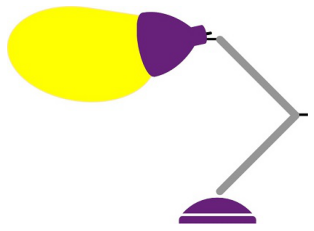

In [1]:
from python_code import luis
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

try:
   # Set up API configuration
    luis_app_id = '30ce4005-2385-4ceb-8915-8033412c1bb4'
    luis_key = 'd324937c87264fa882d4ad988d9dbd5d'
    luis_endpoint = 'https://ai-900-kwlu-temp3.cognitiveservices.azure.com/'

    # prompt for a command
    command = input('Please enter a command: \n')

    # get the predicted intent and entity (code in python_code.home_auto.py)
    action = luis.get_intent(luis_app_id, luis_key, luis_endpoint, command)

    # display an appropriate image
    img_name = action + '.jpg'
    img = Image.open(os.path.join("data", "luis" ,img_name))
    plt.axis('off')
    plt. imshow(img)
except Exception as ex:
    print(ex)

### (!) 체크 인 
위 셀을 실행한 후에 해당 메시지가 표시될 때 *turn the light on*을 입력하셨나요? 메시지는 창 상단에 나타납니다.  

다음 문구를 사용하여 위 셀을 다시 실행하세요.

* *turn on the light*
* *put the lamp off*
* *switch the fan on*
* *switch the light on*
* *switch off the light*
* *turn off the fan*
* *switch the AC on*

위 셀을 실행했는데 물음표 이미지가 표시되면 엔터티, 의도, 말하기를 만들 때 지시한 것과 약간 다른 텍스트나 공백을 사용한 것일 수 있습니다.

> **참고**: Language Understanding 앱에서 의도와 엔터티를 검색하는 데 사용되는 코드가 궁금하면 **python_code** 폴더에서 **luis.py** 파일을 살펴보세요.

## 음성 컨트롤 추가

지금까지, 텍스트를 분석하는 방법을 살펴봤습니다. 하지만 AI 시스템 덕분에 사람이 음성 인식을 통해 소프트웨어 서비스와 커뮤니케이션할 수 있는 경우가 점점 늘어나고 있습니다. 이를 지원하기 위해 **Speech** Cognitive Service는 음성 언어를 텍스트로 필사하는 간단한 방법을 제공합니다.

### Cognitive Services 리소스 만들기

아직 없다면 다음 단계를 따라 Azure 구독에서 **Cognitive Services** 리소스를 만듭니다.

> **참고**: 이미 Cognitive Services 리소스를 보유하고 있다면 Azure Portal에서 **빠른 시작** 페이지를 열고 키 및 위치를 아래의 셀로 복사하기만 하면 됩니다. 리소스가 없다면 아래의 단계를 따라 리소스를 만듭니다.

1. 다른 브라우저 탭에서 Azure Portal([https://portal.azure.com](https://portal.azure.com)) 을 열고 Microsoft 계정으로 로그인합니다.
2. **&#65291;리소스 만들기** 단추를 클릭하고, *Cognitive Services*를 검색하고, 다음 설정을 사용하여 **Cognitive Services** 리소스를 만듭니다.
    - **구독**: *사용자의 Azure 구독*.
    - **리소스 그룹**: *고유한 이름의 새 리소스 그룹을 선택하거나 만듭니다*.
    - **지역**: *사용 가능한 지역을 선택합니다*.
    - **이름**: *고유한 이름을 입력합니다*.
    - **가격 책정 계층**: S0
    - **이 상자를 선택하면 이 서비스가 미국 경찰국에 의해 또는 미국 경찰국을 위해 사용되는 것이 아니라는 점을 인증하는 것입니다**. 선택됨.
    - **알림을 읽고 이해했음을 확인합니다**. 선택됨.
3. 배포가 완료될 때까지 기다립니다. 그런 다음에 Cognitive Services 리소스로 이동하고, **빠른 시작** 페이지에서 키 및 위치를 메모합니다. 클라이언트 애플리케이션에서 Cognitive Services 리소스에 연결하려면 키 및 위치가 필요합니다.

### Cognitive Services 리소스의 키 및 위치 가져오기

Cognitive Services 리소스를 사용하려면 클라이언트 애플리케이션에 인증 키 및 위치가 필요합니다.

1. Azure Portal에 있는 Cognitive Service 리소스의 **키 및 엔드포인트** 페이지에서 리소스의 **Key1**을 복사하고 아래 코드에 붙여 넣어 **YOUR_COG_KEY**를 대체합니다.
2. 리소스의 **위치**를 복사하고 아래 코드에 붙여 넣어 **YOUR_COG_LOCATION**를 대체합니다.
>**참고**: **키 및 엔드포인트** 페이지에 그대로 있으면서 이 페이지에서 **위치**를 복사하세요(예: _westus_). 위치 필드의 단어 사이에 공백을 추가해서는 _안 됩니다_. 
3. 아래 셀의 코드를 실행합니다. 

In [6]:
cog_key = '149b9a076c7d48dd98f306cec2e540c4'
cog_location = 'https://ai-900-kwcgs.cognitiveservices.azure.com/'

print('Ready to use cognitive services in {} using key {}'.format(cog_location, cog_key))

Ready to use cognitive services in https://ai-900-kwcgs.cognitiveservices.azure.com/ using key 149b9a076c7d48dd98f306cec2e540c4


이제 아래 셀을 실행하여 오디오 파일에서 음성을 필사하고, 이를 Language Understanding 앱을 위한 명령으로 사용합니다.

In [7]:
import os
from python_code import luis
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig
from playsound import playsound
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

try:   

    # Get spoken command from audio file
    file_name = 'light-on.wav'
    audio_file = os.path.join('data', 'luis', file_name)

    # Configure speech recognizer
    speech_config = SpeechConfig(cog_key, cog_location)
    audio_config = AudioConfig(filename=audio_file) # Use file instead of default (microphone)
    speech_recognizer = SpeechRecognizer(speech_config, audio_config)

    # Use a one-time, synchronous call to transcribe the speech
    speech = speech_recognizer.recognize_once()

    # Get the predicted intent and entity (code in python_code.home_auto.py)
    action = luis.get_intent(luis_app_id, luis_key, luis_endpoint, speech.text)

    # Get the appropriate image
    img_name = action + '.jpg'

    # Display image 
    img = Image.open(os.path.join("data", "luis" ,img_name))
    plt.axis('off')
    plt. imshow(img)
    playsound(audio_file)

except Exception as ex:
    print(ex)

Exception with an error code: 0x5 (SPXERR_INVALID_ARG)
[CALL STACK BEGIN]

3   libMicrosoft.CognitiveServices.Spee 0x000000011520ab75 _ZN13FileBlobWrite11WriteToFileEPviPKc + 604709
4   libMicrosoft.CognitiveServices.Spee 0x000000011520afa0 _ZN13FileBlobWrite11WriteToFileEPviPKc + 605776
5   libMicrosoft.CognitiveServices.Spee 0x0000000114fc9184 speech_config_from_subscription_internal + 244
6   _speech_py_impl.so                  0x0000000112db73e0 PyInit__speech_py_impl + 953296
7   _speech_py_impl.so                  0x0000000112d0715f PyInit__speech_py_impl + 231759
8   python3.9                           0x000000010082cdca cfunction_call + 90
9   python3.9                           0x00000001007d0e86 _PyObject_MakeTpCall + 134
10  python3.9                           0x00000001008feee7 call_function + 311
11  python3.9                           0x00000001008f7c51 _PyEval_EvalFrameDefault + 27521
12  python3.9                           0x00000001007d1bcb function_code_fastcall + 139

**light-off.wav** 오디오 파일을 사용하도록 위 셀을 수정해 보세요.

## 자세한 내용

[서비스 설명서](https://docs.microsoft.com/azure/cognitive-services/luis/)에서 Language Understanding에 대해 자세히 알아보세요.